In [1]:
import numpy as np 
import pandas as pd 
import os 
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations_with_replacement
from sklearn.model_selection import train_test_split, KFold,  StratifiedKFold,GroupKFold

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# bpps

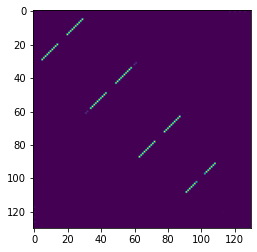

In [2]:
X = np.load('bpps/id_0a5fc0b4d.npy', mmap_mode='r')
plt.imshow(X);

In [3]:
# dir_path = os.path.dirname(os.path.realpath('file.json'))
# cwd = os.getcwd()

# data = pd.read_json(f'{dir_path}\\train.json', lines=True)
# data.to_csv(f"{dir_path}\\train.csv")


# Data Reading


In [2]:
train=pd.read_json('train.json', lines=True)
sub_sample=pd.read_csv("sample_submission.csv")
test=pd.read_csv("test.csv")

In [227]:
train.shape, test.shape , sub_sample.shape

((2400, 19), (2493, 16), (254286, 4))

In [3]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                2400 non-null   int64  
 1   id                   2400 non-null   object 
 2   sequence             2400 non-null   object 
 3   structure            2400 non-null   object 
 4   predicted_loop_type  2400 non-null   object 
 5   signal_to_noise      2400 non-null   float64
 6   SN_filter            2400 non-null   int64  
 7   seq_length           2400 non-null   int64  
 8   seq_scored           2400 non-null   int64  
 9   reactivity_error     2400 non-null   object 
 10  deg_error_Mg_pH10    2400 non-null   object 
 11  deg_error_pH10       2400 non-null   object 
 12  deg_error_Mg_50C     2400 non-null   object 
 13  deg_error_50C        2400 non-null   object 
 14  reactivity           2400 non-null   object 
 15  deg_Mg_pH10          2400 non-null   o

(None, None)

In [177]:
2493*102

254286

In [257]:
test.columns

Index(['id', 'ID', 'sequence', 'structure', 'seqpos', 'errors',
       'deg_pH10_Mg_errors', 'deg_50C_Mg_errors', 'S/N filter',
       'predicted_loop_type', 'seq_scored', 'seq_length', 'cluster_id',
       'n_neighbors', 'first_cluster_member', 'test_filter'],
      dtype='object')

In [25]:
sample = train.loc[train['id'] == 'id_0049f53ba']
len(sample["reactivity"].iloc[0])


68

In [7]:
train.head(5)

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


In [43]:
len(test.loc[test['id'] == "id_40f52a81b"]["deg_pH10_Mg_errors"][0])

1182

In [92]:
train["signal_to_noise"].describe()


count    2400.000000
mean        4.530456
std         2.835142
min        -0.103000
25%         2.391000
50%         4.442500
75%         6.294250
max        17.194000
Name: signal_to_noise, dtype: float64

<AxesSubplot:ylabel='SN_filter'>

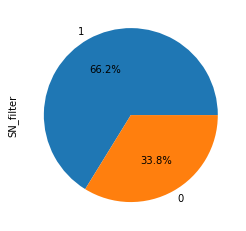

In [98]:
train["SN_filter"].value_counts().plot(kind="pie",autopct='%1.1f%%')

<AxesSubplot:xlabel='signal_to_noise', ylabel='count'>

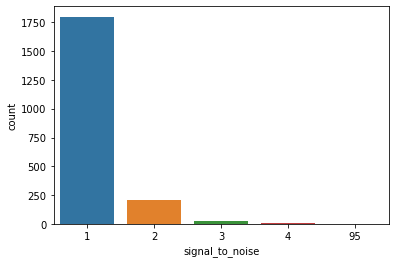

In [103]:
sns.countplot(train["signal_to_noise"].value_counts())

<AxesSubplot:xlabel='signal_to_noise', ylabel='Density'>

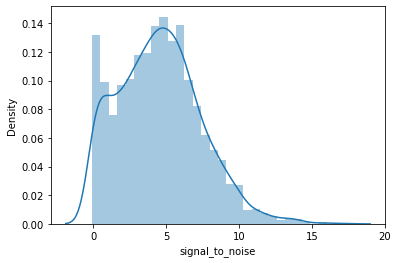

In [104]:
sns.distplot(train["signal_to_noise"])

## Sequence 


 Guanine (G)<br>
 Adenine (A)<br>
 Cytosine (C)<br>
 Uracil (U)<br>

In [4]:
def bases_data(df):
    bases = []
    for j in range(len(df)):
        counts = Counter(df.iloc[j]['sequence'])
        bases.append((
            counts['A'] / df.iloc[j]['seq_length'],
            counts['G'] / df.iloc[j]['seq_length'],
            counts['C'] / df.iloc[j]['seq_length'],
            counts['U'] / df.iloc[j]['seq_length']
        ))
    return pd.DataFrame(bases, columns=['A_percent', 'G_percent', 'C_percent', 'U_percent'])

train_bases=bases_data(train)
test_bases=bases_data(test)


In [229]:
train_bases

,A_percent,G_percent,C_percent,U_percent
0,0.420561,0.177570,0.214953,0.186916
1,0.233645,0.308411,0.299065,0.158879
2,0.401869,0.224299,0.186916,0.186916
3,0.261682,0.327103,0.327103,0.084112
4,0.542056,0.056075,0.056075,0.345794
...,...,...,...,...
2395,0.439252,0.205607,0.168224,0.186916
2396,0.672897,0.056075,0.196262,0.074766
2397,0.299065,0.252336,0.271028,0.177570
2398,0.448598,0.233645,0.158879,0.158879


## Structure

In [5]:
def pairs_rate_data(df):
    pairs_rate = []

    for j in range(len(df)):
        res = Counter(df.iloc[j]['structure'])
        pairs_rate.append(res['('] / df.iloc[j]['seq_length']/2)

    return pd.DataFrame(pairs_rate, columns=['pairs_rate'])
train_pairs_rate=pairs_rate_data(train)
test_pairs_rate=pairs_rate_data(test)


In [203]:
train_pairs_rate

,pairs_rate
0,0.107477
1,0.154206
2,0.112150
3,0.149533
4,0.163551
...,...
2395,0.088785
2396,0.032710
2397,0.158879
2398,0.070093


In [6]:
def pairs_data(df,partners_num):
    pairs = []
    fig_pairs=[]
    all_partners = []
    for j in range(len(df)):
        partners = [-1 for i in range(partners_num)]
        pairs_dict = {}
        queue = []
        for i in range(0, len(df.iloc[j]['structure'])):
            if df.iloc[j]['structure'][i] == '(':
                queue.append(i)
            if df.iloc[j]['structure'][i] == ')':
                first = queue.pop()
                try:
                    pairs_dict[(df.iloc[j]['sequence'][first], df.iloc[j]['sequence'][i])] += 1
                except:
                    pairs_dict[(df.iloc[j]['sequence'][first], df.iloc[j]['sequence'][i])] = 1

                partners[first] = i
                partners[i] = first

        all_partners.append(partners)

        pairs_num = 0
        pairs_unique = [('U', 'G'), ('C', 'G'), ('U', 'A'), ('G', 'C'), ('A', 'U'), ('G', 'U')]
        for item in pairs_dict:
            pairs_num += pairs_dict[item]
        add_tuple = list()
        add_tuple_figure=list()
        for item in pairs_unique:
            try:
                add_tuple.append(pairs_dict[item]/pairs_num)
                add_tuple_figure.append(pairs_dict[item])

            except:
                add_tuple.append(0)
                add_tuple_figure.append(0)
        pairs.append(add_tuple)
        fig_pairs.append(add_tuple_figure)


    return pd.DataFrame(pairs, columns=['U-G', 'C-G', 'U-A', 'G-C', 'A-U', 'G-U'])
    
    
train_pairs=pairs_data(train,107)
test_pairs=pairs_data(test,130)



In [232]:
test_pairs,test_pairs

(           U-G       C-G       U-A       G-C       A-U       G-U
 0     0.032258  0.419355  0.032258  0.516129  0.000000  0.000000
 1     0.032258  0.387097  0.064516  0.354839  0.064516  0.096774
 2     0.000000  0.440000  0.040000  0.480000  0.040000  0.000000
 3     0.000000  0.354839  0.096774  0.483871  0.064516  0.000000
 4     0.000000  0.366667  0.100000  0.400000  0.100000  0.033333
 ...        ...       ...       ...       ...       ...       ...
 2488  0.000000  0.270270  0.216216  0.324324  0.189189  0.000000
 2489  0.000000  0.270270  0.189189  0.351351  0.189189  0.000000
 2490  0.000000  0.428571  0.035714  0.392857  0.107143  0.035714
 2491  0.054054  0.189189  0.135135  0.378378  0.243243  0.000000
 2492  0.000000  0.216216  0.216216  0.378378  0.189189  0.000000
 
 [2493 rows x 6 columns],
            U-G       C-G       U-A       G-C       A-U       G-U
 0     0.032258  0.419355  0.032258  0.516129  0.000000  0.000000
 1     0.032258  0.387097  0.064516  0.354839  0

In [205]:
# partners=pd.DataFrame(all_partners)
# partners

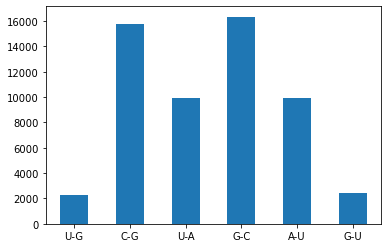

In [175]:
fig_pairs = pd.DataFrame(fig_pairs, columns=['U-G', 'C-G', 'U-A', 'G-C', 'A-U', 'G-U'])
fig_pairs.sum().plot.bar()
plt.xticks(rotation=0)
plt.show()

In [166]:
fig_pairs.sum()

U-G     2280
C-G    15797
U-A     9955
G-C    16336
A-U     9961
G-U     2439
dtype: int64

##  Predicted loop type
 


Describes the structural context:<br> 
S: paired "Stem"<br>
M: Multiloop<br>
I: Internal loop<br>
B: Bulge<br>
H: Hairpin loop<br>
E: dangling End<br>
X: eXternal loop<br>

In [152]:
Counter(train.loc[train['id'] == "id_001f94081"]["predicted_loop_type"][0])

Counter({'E': 26, 'S': 46, 'H': 15, 'B': 1, 'X': 5, 'I': 14})

In [7]:

def loops_data(df):
    
    loops = []
    fig_loops=[]
    for j in range(len(df)):
        counts = Counter(df.iloc[j]['predicted_loop_type'])
        available = ['E', 'S', 'H', 'B', 'X', 'I', 'M']
        row = []
        fig_row=[]
        for item in available:
            try:
                row.append(counts[item] / 107)
                fig_row.append(counts[item])
            except:
                row.append(0)
                fig_row.append(0)

        loops.append(row)
        fig_loops.append(fig_row)
    return pd.DataFrame(loops, columns=available)

train_loops=loops_data(train)
test_loops=loops_data(test)

test_loops  ,train_loops

(             E         S         H         B         X         I         M
 0     0.261682  0.579439  0.093458  0.000000  0.000000  0.280374  0.000000
 1     0.271028  0.579439  0.130841  0.000000  0.000000  0.084112  0.149533
 2     0.271028  0.467290  0.177570  0.000000  0.046729  0.252336  0.000000
 3     0.271028  0.579439  0.158879  0.028037  0.093458  0.084112  0.000000
 4     0.271028  0.560748  0.205607  0.037383  0.084112  0.056075  0.000000
 ...        ...       ...       ...       ...       ...       ...       ...
 2488  0.242991  0.691589  0.177570  0.000000  0.102804  0.000000  0.000000
 2489  0.242991  0.691589  0.177570  0.000000  0.102804  0.000000  0.000000
 2490  0.242991  0.523364  0.233645  0.000000  0.121495  0.018692  0.074766
 2491  0.242991  0.691589  0.177570  0.000000  0.000000  0.000000  0.102804
 2492  0.242991  0.691589  0.177570  0.000000  0.000000  0.000000  0.102804
 
 [2493 rows x 7 columns],
              E         S         H         B         X     

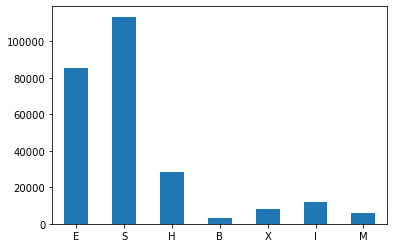

In [173]:
fig_loops = pd.DataFrame(fig_loops, columns=available)
fig_loops.sum().plot.bar()
plt.xticks(rotation=0)
plt.show()

In [167]:
fig_loops.sum()

E     85634
S    113536
H     28624
B      3068
X      7959
I     12187
M      5792
dtype: int64

# Feature Engineering

In [8]:
train = pd.concat([train, train_bases, train_pairs, train_loops, train_pairs_rate], axis=1)
test = pd.concat([test,test_bases, test_pairs, test_loops, test_pairs_rate], axis=1)

test.columns,train.columns

(Index(['id', 'ID', 'sequence', 'structure', 'seqpos', 'errors',
        'deg_pH10_Mg_errors', 'deg_50C_Mg_errors', 'S/N filter',
        'predicted_loop_type', 'seq_scored', 'seq_length', 'cluster_id',
        'n_neighbors', 'first_cluster_member', 'test_filter', 'A_percent',
        'G_percent', 'C_percent', 'U_percent', 'U-G', 'C-G', 'U-A', 'G-C',
        'A-U', 'G-U', 'E', 'S', 'H', 'B', 'X', 'I', 'M', 'pairs_rate'],
       dtype='object'),
 Index(['index', 'id', 'sequence', 'structure', 'predicted_loop_type',
        'signal_to_noise', 'SN_filter', 'seq_length', 'seq_scored',
        'reactivity_error', 'deg_error_Mg_pH10', 'deg_error_pH10',
        'deg_error_Mg_50C', 'deg_error_50C', 'reactivity', 'deg_Mg_pH10',
        'deg_pH10', 'deg_Mg_50C', 'deg_50C', 'A_percent', 'G_percent',
        'C_percent', 'U_percent', 'U-G', 'C-G', 'U-A', 'G-C', 'A-U', 'G-U', 'E',
        'S', 'H', 'B', 'X', 'I', 'M', 'pairs_rate'],
       dtype='object'))

In [9]:
import ast


q2 = test["deg_pH10_Mg_errors"].iloc[0]
x = ast.literal_eval(q2)


'[0.4333, 0.491, 0.4375, 0.3079, 0.5534, 0.3432, 0.398, 0.4423, 0.3221, 0.2172, 0.2177, 0.16340000000000002, 0.20320000000000002, 0.1894, 0.133, 0.22510000000000002, 0.1948, 0.19540000000000002, 0.1882, 0.18080000000000002, 0.1526, 0.16620000000000001, 0.1716, 0.11180000000000001, 0.1499, 0.12090000000000001, 0.18150000000000002, 0.1618, 0.2116, 0.20040000000000002, 0.1753, 0.24080000000000001, 0.193, 0.132, 0.1582, 0.1222, 0.1308, 0.17980000000000002, 0.1781, 0.20570000000000002, 0.2194, 0.2278, 0.22110000000000002, 0.2233, 0.1675, 0.1247, 0.1364, 0.1836, 0.2504, 0.1739, 0.1988, 0.185, 0.1645, 0.1812, 0.1474, 0.1613, 0.1691, 0.1242, 0.1096, 0.1359, 0.19160000000000002, 0.1761, 0.1779, 0.16160000000000002, 0.1355, 0.0975, 0.14300000000000002, 0.16160000000000002, 0.16, 0.1371, 0.12510000000000002, 0.1434, 0.161, 0.1544, 0.15460000000000002, 0.1554, 0.18630000000000002, 0.1374, 0.10980000000000001, 0.0695, 0.1278, 0.0911, 0.0821, 0.099, 0.0687, 0.09860000000000001, 0.08170000000000001, 

In [18]:
# train=train.drop("index",axis=1)

In [131]:
train.columns

Index(['id', 'sequence', 'structure', 'predicted_loop_type', 'signal_to_noise',
       'SN_filter', 'seq_length', 'seq_scored', 'reactivity_error',
       'deg_error_Mg_pH10', 'deg_error_pH10', 'deg_error_Mg_50C',
       'deg_error_50C', 'reactivity', 'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C',
       'deg_50C', 'A_percent', 'G_percent', 'C_percent', 'U_percent', 'U-G',
       'C-G', 'U-A', 'G-C', 'A-U', 'G-U', 'E', 'S', 'H', 'B', 'X', 'I', 'M',
       'pairs_rate', 'A_percent', 'G_percent', 'C_percent', 'U_percent', 'U-G',
       'C-G', 'U-A', 'G-C', 'A-U', 'G-U', 'E', 'S', 'H', 'B', 'X', 'I', 'M',
       'pairs_rate'],
      dtype='object')

In [303]:
type(train['reactivity_error'][0])


list

In [26]:


train_data = []
for mol_id in train['id'].unique():
    sample_data = train.loc[train['id'] == mol_id]
    for i in range(68):
        sample_tuple = (sample_data['id'].values[0],
                        sample_data['sequence'].values[0][i],
                        sample_data['structure'].values[0][i],
                        sample_data['predicted_loop_type'].values[0][i],
                        sample_data['reactivity'].values[0][i], 
                        sample_data['reactivity_error'].values[0][i],
                        sample_data['deg_Mg_pH10'].values[0][i], 
                        sample_data['deg_error_Mg_pH10'].values[0][i],
                        sample_data['deg_pH10'].values[0][i], 
                        sample_data['deg_error_pH10'].values[0][i],
                        sample_data['deg_Mg_50C'].values[0][i],
                        sample_data['deg_error_Mg_50C'].values[0][i],
                        sample_data['deg_50C'].values[0][i],
                        sample_data['deg_error_50C'].values[0][i],
#                         sample_data['partners'].values[0][i],
                        sample_data['A_percent'].values[0],
                        sample_data['G_percent'].values[0],
                        sample_data['C_percent'].values[0],
                        sample_data['U_percent'].values[0],

                        sample_data['U-G'].values[0],
                        sample_data['C-G'].values[0],
                        sample_data['U-A'].values[0],
                        sample_data['G-C'].values[0],
                        sample_data['A-U'].values[0],
                        sample_data['G-U'].values[0],

                        sample_data['E'].values[0],
                        sample_data['S'].values[0],
                        sample_data['H'].values[0],
                        sample_data['B'].values[0],
                        sample_data['X'].values[0],
                        sample_data['I'].values[0],
                        sample_data['M'].values[0],
                        sample_data['pairs_rate'].values[0])

        train_data.append(sample_tuple)



In [27]:
 
train_data_new = pd.DataFrame(train_data,  columns=['id', 'sequence', 'structure','predicted_loop_type',
                                                'reactivity','reactivity_error', 
                                                'deg_Mg_pH10', 'deg_error_Mg_pH10',
                                                'deg_pH10', 'deg_error_pH10',
                                                'deg_Mg_50C', 'deg_error_Mg_50C',
                                                'deg_50C', 'deg_error_50C',
                                                "A_percent","G_percent","C_percent","U_percent",
                                                'U-G', 'C-G', 'U-A', 'G-C', 'A-U', 'G-U',
                                                'E','S', 'H', 'B', 'X', 'I', 'M',
                                                "pairs_rate"])
train_data_new 

,id,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,...,A-U,G-U,E,S,H,B,X,I,M,pairs_rate
0,id_001f94081,G,.,E,0.3297,0.1359,0.7556,0.2613,2.3375,0.2631,...,0.173913,0.000000,0.242991,0.429907,0.140187,0.009346,0.046729,0.130841,0.000000,0.107477
1,id_001f94081,G,.,E,1.5693,0.2070,2.9830,0.3842,3.5060,0.2860,...,0.173913,0.000000,0.242991,0.429907,0.140187,0.009346,0.046729,0.130841,0.000000,0.107477
2,id_001f94081,A,.,E,1.1227,0.1633,0.2526,0.1372,0.3008,0.0964,...,0.173913,0.000000,0.242991,0.429907,0.140187,0.009346,0.046729,0.130841,0.000000,0.107477
3,id_001f94081,A,.,E,0.8686,0.1452,1.3789,0.2531,1.0108,0.1574,...,0.173913,0.000000,0.242991,0.429907,0.140187,0.009346,0.046729,0.130841,0.000000,0.107477
4,id_001f94081,A,.,E,0.7217,0.1314,0.6376,0.1798,0.2635,0.1000,...,0.173913,0.000000,0.242991,0.429907,0.140187,0.009346,0.046729,0.130841,0.000000,0.107477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163195,id_fff546103,C,),S,0.0272,0.0267,0.5059,0.0626,0.4998,0.0996,...,0.151515,0.030303,0.242991,0.616822,0.093458,0.028037,0.000000,0.000000,0.018692,0.154206
163196,id_fff546103,U,),S,0.0382,0.0219,0.2025,0.0411,0.3057,0.0760,...,0.151515,0.030303,0.242991,0.616822,0.093458,0.028037,0.000000,0.000000,0.018692,0.154206
163197,id_fff546103,A,),S,0.0381,0.0218,0.1827,0.0391,0.1642,0.0611,...,0.151515,0.030303,0.242991,0.616822,0.093458,0.028037,0.000000,0.000000,0.018692,0.154206
163198,id_fff546103,G,),S,-0.0066,0.0220,0.3261,0.0509,0.1654,0.0719,...,0.151515,0.030303,0.242991,0.616822,0.093458,0.028037,0.000000,0.000000,0.018692,0.154206


# oooooooooooooooooooooooooooooooooooooooooooooooooooooo

In [271]:
# test=test.drop([ 'ID',  'seqpos', , 'S/N filter',
#         'seq_scored', 'seq_length', 'cluster_id',
#        'n_neighbors', 'first_cluster_member', 'test_filter'],axis=1)



In [12]:
# q2 = test['deg_pH10_Mg_errors'].iloc[0]

# x = ast.literal_eval(q2)


for i in range(len(test)):   
    test['errors'].values[i] =ast.literal_eval(test['errors'].values[i])
    test['deg_50C_Mg_errors'].values[i] =ast.literal_eval(test['deg_50C_Mg_errors'].values[i])
    test['deg_pH10_Mg_errors'].values[i] =ast.literal_eval(test['deg_pH10_Mg_errors'].values[i])


In [13]:
# ['errors','deg_50C_Mg_errors', 'deg_pH10_Mg_errors']
test_data = []
for mol_id in test['id'].unique():
    sample_data = test.loc[test['id'] == mol_id]
    
    for i in range(102):
        sample_tuple = (sample_data['id'].values[0],
                        sample_data['sequence'].values[0][i],
                        sample_data['structure'].values[0][i],
                        sample_data['predicted_loop_type'].values[0][i],
                        
                        
                        
                        sample_data['errors'].values[0][i],
                        sample_data['deg_50C_Mg_errors'].values[0][i],
                        sample_data['deg_pH10_Mg_errors'].values[0][i],

                        sample_data['A_percent'].values[0],
                        sample_data['G_percent'].values[0],
                        sample_data['C_percent'].values[0],
                        sample_data['U_percent'].values[0],

                        sample_data['U-G'].values[0],
                        sample_data['C-G'].values[0],
                        sample_data['U-A'].values[0],
                        sample_data['G-C'].values[0],
                        sample_data['A-U'].values[0],
                        sample_data['G-U'].values[0],

                        sample_data['E'].values[0],
                        sample_data['S'].values[0],
                        sample_data['H'].values[0],
                        sample_data['B'].values[0],
                        sample_data['X'].values[0],
                        sample_data['I'].values[0],
                        sample_data['M'].values[0],
                        sample_data['pairs_rate'].values[0])

        test_data.append(sample_tuple)
    



In [14]:
test_data_new= pd.DataFrame(test_data,  columns=['id', 'sequence', 'structure','predicted_loop_type',
                                                'errors','deg_50C_Mg_errors', 'deg_pH10_Mg_errors',
                                                "A_percent","G_percent","C_percent","U_percent",
                                                'U-G', 'C-G', 'U-A', 'G-C', 'A-U', 'G-U',
                                                'E','S', 'H', 'B', 'X', 'I', 'M',
                                                "pairs_rate"])
test_data_new

,id,sequence,structure,predicted_loop_type,errors,deg_50C_Mg_errors,deg_pH10_Mg_errors,A_percent,G_percent,C_percent,...,A-U,G-U,E,S,H,B,X,I,M,pairs_rate
0,id_40f52a81b,G,.,E,0.4419,0.5922,0.4333,0.207692,0.476923,0.269231,...,0.000000,0.0,0.261682,0.579439,0.093458,0.0,0.0,0.280374,0.000000,0.119231
1,id_40f52a81b,G,.,E,0.4736,0.5873,0.4910,0.207692,0.476923,0.269231,...,0.000000,0.0,0.261682,0.579439,0.093458,0.0,0.0,0.280374,0.000000,0.119231
2,id_40f52a81b,A,.,E,0.4529,0.4347,0.4375,0.207692,0.476923,0.269231,...,0.000000,0.0,0.261682,0.579439,0.093458,0.0,0.0,0.280374,0.000000,0.119231
3,id_40f52a81b,A,.,E,0.3082,0.4182,0.3079,0.207692,0.476923,0.269231,...,0.000000,0.0,0.261682,0.579439,0.093458,0.0,0.0,0.280374,0.000000,0.119231
4,id_40f52a81b,A,.,E,0.4485,0.6207,0.5534,0.207692,0.476923,0.269231,...,0.000000,0.0,0.261682,0.579439,0.093458,0.0,0.0,0.280374,0.000000,0.119231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254281,id_1f4f84bfb,U,(,S,0.3063,0.3282,0.1668,0.392308,0.223077,0.238462,...,0.189189,0.0,0.242991,0.691589,0.177570,0.0,0.0,0.000000,0.102804,0.142308
254282,id_1f4f84bfb,U,.,H,0.4001,0.4397,0.4051,0.392308,0.223077,0.238462,...,0.189189,0.0,0.242991,0.691589,0.177570,0.0,0.0,0.000000,0.102804,0.142308
254283,id_1f4f84bfb,U,.,H,0.2157,0.2320,0.1620,0.392308,0.223077,0.238462,...,0.189189,0.0,0.242991,0.691589,0.177570,0.0,0.0,0.000000,0.102804,0.142308
254284,id_1f4f84bfb,C,.,H,0.2291,0.3359,0.2638,0.392308,0.223077,0.238462,...,0.189189,0.0,0.242991,0.691589,0.177570,0.0,0.0,0.000000,0.102804,0.142308


# Encoding

In [30]:
seq = pd.get_dummies(train_data_new['sequence'])
struc = pd.get_dummies(train_data_new['structure'])
loop = pd.get_dummies(train_data_new['predicted_loop_type'])

train_data_new= pd.concat([train_data_new,seq, struc, loop],axis=1).drop(["id",'sequence', 'structure', 'predicted_loop_type',
                                                                         'deg_pH10' ,'deg_error_pH10' ,'deg_50C', 'deg_error_50C'],axis=1)


In [ ]:
import seaborn as sns 
copy_train=train_data_new.copy()
sns.heatmap(copy_train, annot=True)

In [16]:
seq_test = pd.get_dummies(test_data_new['sequence'])
struc_test = pd.get_dummies(test_data_new['structure'])
loop_test = pd.get_dummies(test_data_new['predicted_loop_type'])


test_data_new= pd.concat([test_data_new,seq_test, struc_test, loop_test],axis=1).drop(["id",'sequence', 'structure', 'predicted_loop_type'],axis=1)


In [17]:
test_data_new.shape

(254286, 35)

In [18]:
train_data_new.columns  #'deg_pH10' ,'deg_error_pH10' ,'deg_50C', 'deg_error_50C'

Index(['reactivity', 'reactivity_error', 'deg_Mg_pH10', 'deg_error_Mg_pH10',
       'deg_pH10', 'deg_error_pH10', 'deg_Mg_50C', 'deg_error_Mg_50C',
       'deg_50C', 'deg_error_50C', 'A_percent', 'G_percent', 'C_percent',
       'U_percent', 'U-G', 'C-G', 'U-A', 'G-C', 'A-U', 'G-U', 'E', 'S', 'H',
       'B', 'X', 'I', 'M', 'pairs_rate', 'A', 'C', 'G', 'U', '(', ')', '.',
       'B', 'E', 'H', 'I', 'M', 'S', 'X'],
      dtype='object')

In [198]:
# df_train=pd.read_csv("Train_data_new.csv")

# df_train=df_train.drop(["Unnamed: 0","id"],axis=1  )


,id,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_Mg_50C,deg_error_Mg_50C,deg_50C,...,(,),.,B,E,H,I,M,S,X
0,id_001f94081,0.3297,0.1359,0.7556,0.2613,2.3375,0.2631,0.3581,0.1501,0.6382,...,0,0,1,0,1,0,0,0,0,0
1,id_001f94081,1.5693,0.2070,2.9830,0.3842,3.5060,0.2860,2.9683,0.2750,3.4773,...,0,0,1,0,1,0,0,0,0,0
2,id_001f94081,1.1227,0.1633,0.2526,0.1372,0.3008,0.0964,0.2589,0.0947,0.9988,...,0,0,1,0,1,0,0,0,0,0
3,id_001f94081,0.8686,0.1452,1.3789,0.2531,1.0108,0.1574,1.4552,0.1866,1.3228,...,0,0,1,0,1,0,0,0,0,0
4,id_001f94081,0.7217,0.1314,0.6376,0.1798,0.2635,0.1000,0.7244,0.1369,0.7877,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163195,id_fff546103,0.0272,0.0267,0.5059,0.0626,0.4998,0.0996,0.2870,0.0638,0.1820,...,0,1,0,0,0,0,0,0,1,0
163196,id_fff546103,0.0382,0.0219,0.2025,0.0411,0.3057,0.0760,0.2022,0.0520,0.2038,...,0,1,0,0,0,0,0,0,1,0
163197,id_fff546103,0.0381,0.0218,0.1827,0.0391,0.1642,0.0611,0.2047,0.0520,0.1120,...,0,1,0,0,0,0,0,0,1,0
163198,id_fff546103,-0.0066,0.0220,0.3261,0.0509,0.1654,0.0719,0.2447,0.0595,0.1186,...,0,1,0,0,0,0,0,0,1,0


In [22]:
train_data_new=train_data_new.drop(['deg_pH10' ,'deg_error_pH10' ,'deg_50C', 'deg_error_50C'],axis=1)

In [24]:
train_data_new.columns

Index(['reactivity', 'reactivity_error', 'deg_Mg_pH10', 'deg_error_Mg_pH10',
       'deg_Mg_50C', 'deg_error_Mg_50C', 'A_percent', 'G_percent', 'C_percent',
       'U_percent', 'U-G', 'C-G', 'U-A', 'G-C', 'A-U', 'G-U', 'E', 'S', 'H',
       'B', 'X', 'I', 'M', 'pairs_rate', 'A', 'C', 'G', 'U', '(', ')', '.',
       'B', 'E', 'H', 'I', 'M', 'S', 'X'],
      dtype='object')

In [395]:
# train_data_new.to_json (r'train_data_new.json')#records', 'index',
# # test_data_new.to_json (r'test_data_new.json')

In [ ]:
type(train_data_new)

In [ ]:

# train = pd.DataFrame()
# train.to_json ('Export_DataFrame.json')

# Model


In [311]:
train_copy=train_data_new.copy()
train_copy=train_data_new.drop(["id",'reactivity', 'deg_Mg_pH10', 'deg_Mg_50C'], axis=1)


In [312]:
target_cols = ['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C']
token2int = {x: i for i, x in enumerate('().ACGUBEHIMSX')}
def pandas_list_to_array(train):
    return np.transpose(np.array(train.values.tolist()),
                      (0, 1))
data_inputs = pandas_list_to_array(train_copy)
print(data_inputs.shape)
data_labels = pandas_list_to_array(train_data_new[target_cols])
print(data_labels.shape)


(163200, 35)
(163200, 3)


# RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_inputs,data_labels,test_size=0.3,random_state=0)



estimator = RandomForestRegressor()
param_grid = { 
        "n_estimators"      : [200,400,500,600],
        "max_features"      : ["auto", "sqrt", "log2"],
        "min_samples_split" : [2,4,8],
        "bootstrap": [True, False],
        }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(X_train, y_train)


print(grid.best_score_ , grid.best_params_)
# clf = RandomForestRegressor()
# clf.fit(X_train,y_train)

# preds=clf.predict(X_test)
# print(y_test)
# print('ssssssssss')
# print(preds)
# score = mean_squared_error(y_test, preds)
# print('score',score)
# print('MSE RandomForestRegressor:', np.sqrt(score))

# GradientBoostingRegressor

In [371]:

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV



param_grid = {'estimator__min_samples_split':[10, 50],
              'estimator__min_samples_leaf':[ 150]}
gb = GradientBoostingRegressor()

clf = GridSearchCV(MultiOutputRegressor(gb), param_grid=param_grid)


clf.fit(X_train,y_train)

preds=clf.predict(X_test)
print(y_test)
print('ssssssssss')
print(preds)
score = mean_squared_error(y_test, preds)
print('score',score)
print('MSE GradientBoostingRegressor:', np.sqrt(score))

[[0.     0.2245 0.    ]
 [0.4124 1.1311 0.9513]
 [0.4312 0.1582 0.0776]
 ...
 [0.139  0.2491 0.2974]
 [0.     0.     0.    ]
 [3.141  3.2453 3.3186]]
ssssssssss
[[0.18163315 0.44939624 0.26116069]
 [0.41764569 0.69789475 0.55892401]
 [0.29898444 0.22850286 0.20572123]
 ...
 [0.30630454 0.20126467 0.30784477]
 [0.10193683 0.49070061 0.26416205]
 [1.0354363  1.19533497 1.19651272]]
score 0.4340955606581199
MSE RandomForestRegressor: 0.6588592874492397


# CatBoost


In [ ]:
model = CatBoostClassifier(iterations=10,
                           learning_rate=1,
                           depth=2,
                           loss_function='MultiClass')
model.fit(X_train,y_train)

preds=model.predict(X_test)
print(y_test)
print('ssssssssss')
print(preds)
score = mean_squared_error(y_test, preds)
print('score',score)
print('MSE GradientBoostingRegressor:', np.sqrt(score))


# XGBOOST

In [1]:
from xgboost import XGBRegressor
clf = XGBRegressor(
    n_estimators=800,
    eval_metric='rmse',
    learning_rate=0.1,
    subsample=0.8, # prevent overfitting
    colsample_bytree=0.8 # prevent overfitting
)

clf.fit(X_train, y_train) 

preds=clf.predict(X_test)
print(y_test)
print('ssssssssss')
print(preds)
score = mean_squared_error(y_test, preds)
print('score',score)
print('MSE XGBRegressor:', np.sqrt(score))


# Test Evaluation 

In [373]:
# sample_sub = pd.read_csv('sample_submission.csv')


def pandas_list_to_array(train):
    return np.transpose(np.array(train.values.tolist()),
                      (0, 1))


preds1=clf.predict(pandas_list_to_array(test_data_new))


react =preds1[:,0]
print(react)
mg10 =preds1[:,1]
print(mg10)
mg50 =preds1[:,2]
print(mg50)

sample_sub['reactivity'] = react
sample_sub['deg_Mg_pH10'] = mg10
sample_sub['deg_Mg_50C'] = mg50


sample_sub.to_csv('fixed_output_Gradent.csv', index=False)


[1.00170957 1.00170957 1.00170957 ... 1.12289325 0.87836018 1.18046968]
[1.43711921 1.39301265 0.73418013 ... 0.81881493 0.93603416 0.99900695]
[1.18132531 1.20987932 1.10117761 ... 0.64401984 0.78997292 0.83713208]


In [358]:
sample_sub

,id_seqpos,reactivity,deg_Mg_pH10,deg_Mg_50C
0,id_40f52a81b_0,1.043514,1.392948,1.382557
1,id_40f52a81b_1,1.033096,1.327024,1.326202
2,id_40f52a81b_2,0.960647,0.596350,0.941750
3,id_40f52a81b_3,0.899789,0.776223,0.953446
4,id_40f52a81b_4,0.847409,0.803747,1.206175
...,...,...,...,...
254281,id_1f4f84bfb_97,0.485754,0.449970,0.343258
254282,id_1f4f84bfb_98,1.246896,0.772066,0.624755
254283,id_1f4f84bfb_99,1.478548,0.692665,0.436151
254284,id_1f4f84bfb_100,0.858578,1.248109,1.014054


In [360]:
# train_data = []
# # for mol_id in train['id'].unique():
# sample_data = train.loc[train['id'] == "id_001f94081"]
# for i in range(68): 
#     if i < 3:
#         previousA = -1
#         previousB = -1
#         previousC = -1
#         print(i,previousA,previousB,previousC)
#     else:
#         if i%3 == 0:
#             previousA = sample_data['sequence'].values[0][i - 3]
#             previousB = sample_data['sequence'].values[0][i - 2]
#             previousC = sample_data['sequence'].values[0][i - 1]
#             print(i,previousA,previousB,previousC)
#         if i%3 == 1:
#             previousA = sample_data['sequence'].values[0][i - 4]
#             previousB = sample_data['sequence'].values[0][i - 3]
#             previousC = sample_data['sequence'].values[0][i - 2]
#             print(i,previousA,previousB,previousC)
#         if i%3 == 2:
#             previousA = sample_data['sequence'].values[0][i - 5]
#             previousB = sample_data['sequence'].values[0][i - 4]
#             previousC = sample_data['sequence'].values[0][i - 3]
#             print(i,previousA,previousB,previousC)
#         if i%3 == 0:
#             a = sample_data['sequence'].values[0][i]
#             b = sample_data['sequence'].values[0][i + 1]
#             c = sample_data['sequence'].values[0][i + 2]
#             print(i,a,b,c)

In [361]:
# train_data = []
# for mol_id in train['id'].unique():
#     sample_data = train.loc[train['id'] == mol_id]
#     for i in range(68): 
#         if i < 3:
#             previousA = -1
#             previousB = -1
#             previousC = -1
#         else:
#             if i%3 == 0:
#                 previousA = sample_data['sequence'].values[0][i - 3]
#                 previousB = sample_data['sequence'].values[0][i - 2]
#                 previousC = sample_data['sequence'].values[0][i - 1]
#             if i%3 == 1:
#                 previousA = sample_data['sequence'].values[0][i - 4]
#                 previousB = sample_data['sequence'].values[0][i - 3]
#                 previousC = sample_data['sequence'].values[0][i - 2]
#             if i%3 == 2:
#                 previousA = sample_data['sequence'].values[0][i - 5]
#                 previousB = sample_data['sequence'].values[0][i - 4]
#                 previousC = sample_data['sequence'].values[0][i - 3]
            
            
#         if i%3 == 0:
#             a = sample_data['sequence'].values[0][i]
#             b = sample_data['sequence'].values[0][i + 1]
#             c = sample_data['sequence'].values[0][i + 2]
            
#             nextA = sample_data['sequence'].values[0][i + 3]
#             nextB = sample_data['sequence'].values[0][i + 4]
#             nextC = sample_data['sequence'].values[0][i + 5]
#             next2A = sample_data['sequence'].values[0][i + 6]
#             next2B = sample_data['sequence'].values[0][i + 7]
#             next2C = sample_data['sequence'].values[0][i + 8]
#             next3A = sample_data['sequence'].values[0][i + 9]
#             next3B = sample_data['sequence'].values[0][i + 10]
#             next3C = sample_data['sequence'].values[0][i + 11]
            
#         if i%3 == 1:
#             a = sample_data['sequence'].values[0][i - 1]
#             b = sample_data['sequence'].values[0][i]
#             c = sample_data['sequence'].values[0][i + 1]
            
#             nextA = sample_data['sequence'].values[0][i + 2]
#             nextB = sample_data['sequence'].values[0][i + 3]
#             nextC = sample_data['sequence'].values[0][i + 4]
#             next2A = sample_data['sequence'].values[0][i + 5]
#             next2B = sample_data['sequence'].values[0][i + 6]
#             next2C = sample_data['sequence'].values[0][i + 7]
#             next3A = sample_data['sequence'].values[0][i + 8]
#             next3B = sample_data['sequence'].values[0][i + 9]
#             next3C = sample_data['sequence'].values[0][i + 10]
            
#         if i%3 == 2:
#             a = sample_data['sequence'].values[0][i - 2]
#             b = sample_data['sequence'].values[0][i - 1]
#             c = sample_data['sequence'].values[0][i]
            
#             nextA = sample_data['sequence'].values[0][i + 1]
#             nextB = sample_data['sequence'].values[0][i + 2]
#             nextC = sample_data['sequence'].values[0][i + 3]
#             next2A = sample_data['sequence'].values[0][i + 4]
#             next2B = sample_data['sequence'].values[0][i + 5]
#             next2C = sample_data['sequence'].values[0][i + 6]
#             next3A = sample_data['sequence'].values[0][i + 7]
#             next3B = sample_data['sequence'].values[0][i + 8]
#             next3C = sample_data['sequence'].values[0][i + 9]
            
#         if a==b and b==c:
#             all_the_same = 1
#         else:
#             all_the_same = 0
            
#         if sample_data['structure'].values[0][i] == ')' or sample_data['structure'].values[0][i] == '(':
#             isPair = 1
#         else:
#             isPair = 0
        
#         partner_index = sample_data['partners'].values[0][i]
#         if partner_index != -1:
#             partner =  sample_data['sequence'].values[0][partner_index]
#         else:
#             partner = -1
        
#         sample_tuple = (
#             sample_data['id'].values[0], 
#             sample_data['sequence'].values[0][i],
#             sample_data['structure'].values[0][i], 
#             sample_data['predicted_loop_type'].values[0][i],
#             sample_data['reactivity'].values[0][i], 
#             sample_data['reactivity_error'].values[0][i],
#             sample_data['deg_Mg_pH10'].values[0][i], 
#             sample_data['deg_error_Mg_pH10'].values[0][i],
#             sample_data['deg_pH10'].values[0][i], 
#             sample_data['deg_error_pH10'].values[0][i],
#             sample_data['deg_Mg_50C'].values[0][i], 
#             sample_data['deg_error_Mg_50C'].values[0][i],
#             sample_data['deg_50C'].values[0][i], 
#             sample_data['deg_error_50C'].values[0][i],
#             sample_data['A_percent'].values[0], 
#             sample_data['G_percent'].values[0],
#             sample_data['C_percent'].values[0], 
#             sample_data['U_percent'].values[0],
#             sample_data['U-G'].values[0], 
#             sample_data['C-G'].values[0],
#             sample_data['U-A'].values[0], 
#             sample_data['G-C'].values[0],
#             sample_data['A-U'].values[0], 
#             sample_data['G-U'].values[0], 
#             sample_data['E'].values[0],
#             sample_data['S'].values[0], 
#             sample_data['H'].values[0],
#             sample_data['B'].values[0], 
#             sample_data['X'].values[0],
#             sample_data['I'].values[0], 
#             sample_data['M'].values[0],
#             sample_data['pairs_rate'].values[0],
#             i%3,
#             a,
#             b,
#             c,
#             (i%107) / 68,
#             all_the_same, 
#             isPair,
#             previousA,
#             previousB,
#             previousC,
#             nextA,
#             nextB,
#             nextC,
#             next2A,
#             next2B,
#             next2C,
#             next3A,
#             next3B,
#             next3C,
#             partner
#         )
#         train_data.append(sample_tuple)